<a href="https://colab.research.google.com/github/inusah4/AI4CCEE_Adnan44/blob/main/AI4CCEE_Adnan44/in_class_activity/Lecture5%20/submissions/Adnan_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Activity #1 Predicting Speed Using Linear Regression
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read data to create dataframe
df = pd.read_csv('Car_Speed.csv')

In [ ]:
# Inspect dataframe
print(df.head())
print(df.describe())

   day                 Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  2022-07-10 00:00:00            NaN            NaN            3.0   
1    1  2022-07-10 00:01:00           10.0           62.0            2.0   
2    1  2022-07-10 00:02:00            5.0           63.6            4.0   
3    1  2022-07-10 00:03:00           11.0           58.2            9.0   
4    1  2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  
                 day  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
count  223048.000000  218324.000000  218324.000000  218613.000000   
mean       15.843863      49.757951      61.758002      38.232324   
std         8.788900      34.568520       3.577977      29.641309   
min         1.000000       0.000000       0.000000       0.000000   
25%   

In [ ]:
# Create the clean dataframe
df_clean = df[['day', 'Time', 'WAVE-SW-Count', 'WAVE-SW-Speed', 'Month', 'Year']].copy()

# Rename the columns
df_clean = df_clean.rename(columns={'WAVE-SW-Count': 'Count', 'WAVE-SW-Speed': 'Speed'})

# Display the cleaned dataframe
print(df_clean.head())

   day                 Time  Count  Speed  Month  Year
0    1  2022-07-10 00:00:00    3.0   59.5     10  2021
1    1  2022-07-10 00:01:00    2.0   59.0     10  2021
2    1  2022-07-10 00:02:00    4.0   58.4     10  2021
3    1  2022-07-10 00:03:00    9.0   60.0     10  2021
4    1  2022-07-10 00:04:00   17.0   61.2     10  2021


In [ ]:
# Define the threshold
threshold = 40

# Filter the DataFrame for Day 1 where WAVE-SW-Speed is greater than the threshold
df_speed = df_clean[(df_clean['day'] == 1) & (df_clean['Speed'] > threshold)]

In [ ]:
# Count the number of times speed drops below threshold
count = (df_speed['Speed'] < threshold).sum()

# Print the count
print(f'The speed drops below {threshold} a total of {count} times.')

The speed drops below 40 a total of 0 times.


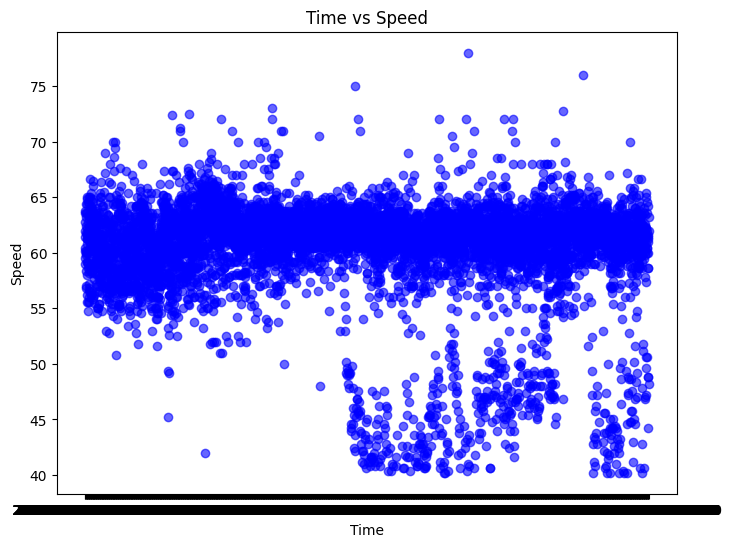

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_speed['Time'], df_speed['Speed'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Time vs Speed')

plt.show()

In [ ]:
# Filter the DataFrame for WAVE-SW-Speed is greater than the threshold
df_speed = df_speed[df_speed['Speed'] > threshold]

In [ ]:
# Convert 'Time' column to datetime objects
df_speed['Time'] = pd.to_datetime(df_speed['Time'])

In [ ]:
# Inspect dataframe
print(df_speed.head())
print(df_speed.describe())

   day                Time  Count  Speed  Month  Year
0    1 2022-07-10 00:00:00    3.0   59.5     10  2021
1    1 2022-07-10 00:01:00    2.0   59.0     10  2021
2    1 2022-07-10 00:02:00    4.0   58.4     10  2021
3    1 2022-07-10 00:03:00    9.0   60.0     10  2021
4    1 2022-07-10 00:04:00   17.0   61.2     10  2021
          day                           Time        Count        Speed  \
count  7229.0                           7229  7229.000000  7229.000000   
mean      1.0  2022-07-10 11:55:10.300180224    37.946604    60.421352   
min       1.0            2022-07-10 00:00:00     0.000000    40.200000   
25%       1.0            2022-07-10 06:00:00     8.000000    59.600000   
50%       1.0            2022-07-10 11:46:00    30.000000    61.600000   
75%       1.0            2022-07-10 17:58:00    61.000000    62.800000   
max       1.0            2022-07-10 23:59:00   151.000000    78.000000   
std       0.0                            NaN    32.349056     4.637381   

         

In [ ]:
# Install scikit-learn
pip install scikit-learn

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature set (X) and the target variable (y)
# Convert 'Time' to numerical representation (e.g., total seconds since start)
df_speed['Time_numeric'] = (df_speed['Time'] - df_speed['Time'].min()).dt.total_seconds()

# Create the feature set (X) and the target variable (y)
X = df_speed[['day', 'Time_numeric', 'Count', 'Month', 'Year']]  # Features
y = df_speed['Speed']  # Target variable (Speed)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Print out the mean squared error
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15.262018967579715


In [ ]:
rmse = np.sqrt(15.262018967579715)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3.9066634059744274


In [ ]:
print(df_speed.head())

   day                Time  Count  Speed  Month  Year  Time_numeric
0    1 2022-07-10 00:00:00    3.0   59.5     10  2021           0.0
1    1 2022-07-10 00:01:00    2.0   59.0     10  2021          60.0
2    1 2022-07-10 00:02:00    4.0   58.4     10  2021         120.0
3    1 2022-07-10 00:03:00    9.0   60.0     10  2021         180.0
4    1 2022-07-10 00:04:00   17.0   61.2     10  2021         240.0


In [ ]:
# Activity #2 Clustering Car Speed vs. Time
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans

In [ ]:
# Specify the number of clusters, for example, 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model on the 'Time_numeric' column
df_speed['Cluster'] = kmeans.fit_predict(df_speed[['Time_numeric']])

# Display the clustered dataframe with the new 'Cluster' column
print(df_speed)

# Print the cluster centers (in seconds)
print("Cluster centers (in seconds):", kmeans.cluster_centers_)


        day                Time  Count  Speed  Month  Year  Time_numeric  \
0         1 2022-07-10 00:00:00    3.0   59.5     10  2021           0.0   
1         1 2022-07-10 00:01:00    2.0   59.0     10  2021          60.0   
2         1 2022-07-10 00:02:00    4.0   58.4     10  2021         120.0   
3         1 2022-07-10 00:03:00    9.0   60.0     10  2021         180.0   
4         1 2022-07-10 00:04:00   17.0   61.2     10  2021         240.0   
...     ...                 ...    ...    ...    ...   ...           ...   
184432    1 2022-07-10 23:54:00    2.0   61.0      3  2022       86040.0   
184433    1 2022-07-10 23:55:00    5.0   61.2      3  2022       86100.0   
184434    1 2022-07-10 23:56:00    8.0   63.4      3  2022       86160.0   
184435    1 2022-07-10 23:57:00    6.0   63.0      3  2022       86220.0   
184436    1 2022-07-10 23:58:00    6.0   63.8      3  2022       86280.0   

        Cluster  
0             0  
1             0  
2             0  
3             0

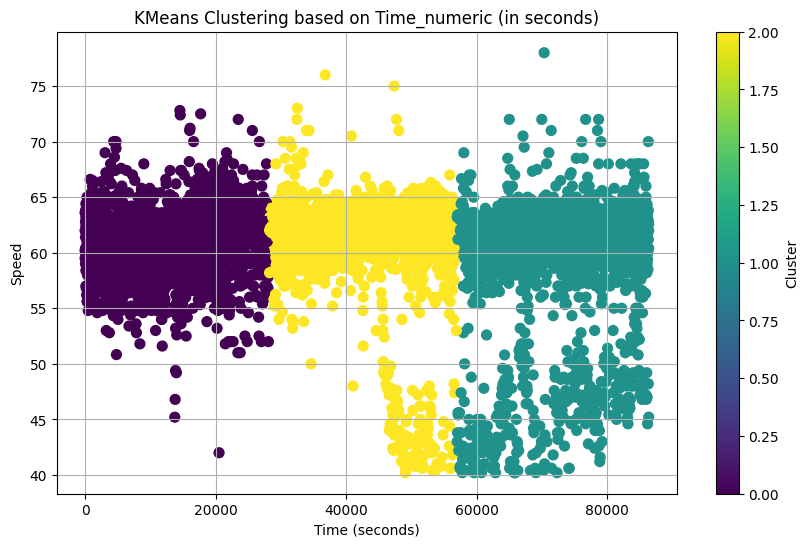

In [ ]:
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))

# Plot Time_numeric vs Speed, color by Cluster
plt.scatter(df_speed['Time_numeric'], df_speed['Speed'], c=df_speed['Cluster'], cmap='viridis', s=50)

# Adding plot details
plt.title('KMeans Clustering based on Time_numeric (in seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed')
plt.colorbar(label='Cluster')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Activity #3 Understanding and Applying Random Forest for Crash Data Analysis
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read data to create dataframe
df = pd.read_csv('Ames_August_Crashes_Clean.csv')

In [ ]:
# Inspect dataframe
print(df.head())

       Date   DOT Case # Agency Case #  City County  \
0  8/1/2024  20241436054      24002750  Ames  Story   
1  8/1/2024  20241435378      24002751  Ames  Story   
2  8/2/2024  20241435839      24002760  Ames  Story   
3  8/2/2024  20241436408      24002762  Ames  Story   
4  8/4/2024  20241435605      24002790  Ames  Story   

                         Severity  \
0            Property Damage Only   
1  Suspected Serious Injury Crash   
2   Possible/Unknown Injury Crash   
3            Property Damage Only   
4            Property Damage Only   

                                 Literal Description  
0  US 69 S                                       ...  
1  VALLEY VIEW RD AND HARRISON RD                ...  
2  24TH ST                                       ...  
3  ONTARIO ST                                    ...  
4  SE 16TH ST                                    ...  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 51 non-null     object
 1   DOT Case #           51 non-null     int64 
 2   Agency Case #        51 non-null     object
 3   City                 51 non-null     object
 4   County               51 non-null     object
 5   Severity             51 non-null     object
 6   Literal Description  51 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB
None


In [ ]:
# Check for missing values
df.isnull().sum()
df.isnull().values.any()
df.isnull().sum().sum()

0

In [ ]:
print(df.describe())

         DOT Case #
count  5.100000e+01
mean   2.024144e+10
std    1.471415e+03
min    2.024144e+10
25%    2.024144e+10
50%    2.024144e+10
75%    2.024144e+10
max    2.024144e+10


In [ ]:
# Check all unique values in the "severity" column
unique_values = df['Severity'].unique()
print(unique_values)

['Property Damage Only' 'Suspected Serious Injury Crash'
 'Possible/Unknown Injury Crash' 'Suspected Minor Injury Crash']


In [ ]:
df.isnull().sum()

,0
Date,0
DOT Case #,0
Agency Case #,0
City,0
County,0
Severity,0
Literal Description,0


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Example of preprocessing the dataset (assuming df is your original DataFrame)

# Convert 'Date' column to numerical values (you can use year, month, or full timestamp)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop original 'Date' column if not needed anymore
df = df.drop('Date', axis=1)

# Encode categorical columns 'City' and 'County' using LabelEncoder
label_encoder_city = LabelEncoder()
label_encoder_county = LabelEncoder()

df['City_Numeric'] = label_encoder_city.fit_transform(df['City'])
df['County_Numeric'] = label_encoder_county.fit_transform(df['County'])
df['Severity_Numeric'] = label_encoder_city.fit_transform(df['Severity'])

# Now select the features and target variable
X = df[['Year', 'Month', 'Day', 'DOT Case #', 'Agency Case #', 'City_Numeric', 'County_Numeric']]  # Features
y = df['Severity_Numeric']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest model with n_estimators=100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", accuracy)

ValueError: could not convert string to float: '24-000954'